In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as py
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print('imported')

imported


In [5]:
df = pd.read_csv(r"C:\Users\aksha\Desktop\dataset and all\training_set_features.csv", sep=",", encoding= 'unicode_escape')
dl = pd.read_csv(r"C:\Users\aksha\Desktop\dataset and all\training_set_labels.csv", sep=",", encoding= 'unicode_escape')

In [6]:
df = df.drop(['marital_status','race','education','income_poverty', 'rent_or_own', 'hhs_geo_region', 'employment_industry', 'employment_occupation', 'household_adults', 'household_children', 'census_msa', 'employment_status', 'age_group'], axis=1)
df['sex'].replace('Male', 1, inplace=True)
df['sex'].replace('Female', 0, inplace=True)
df.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'sex'],
      dtype='object')

In [7]:
dl = dl.drop(['respondent_id'], axis=1)

In [8]:
df.head(5)

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,sex
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,0


In [9]:
df.shape

(26707, 23)

In [106]:
df.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
sex                              int64
dtype: object

In [11]:
pipeline = Pipeline(steps=[('imputer', KNNImputer(n_neighbors=10))])
# Impute missing values using the pipeline
df_imputed = pd.DataFrame(pipeline.fit_transform(df.drop(columns=['respondent_id'])), columns=df.columns[1:])

In [104]:
df_imputed.shape

(26707, 22)

In [105]:
df_imputed.columns

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'sex'],
      dtype='object')

In [107]:
corr_matrix = df_imputed.corr()

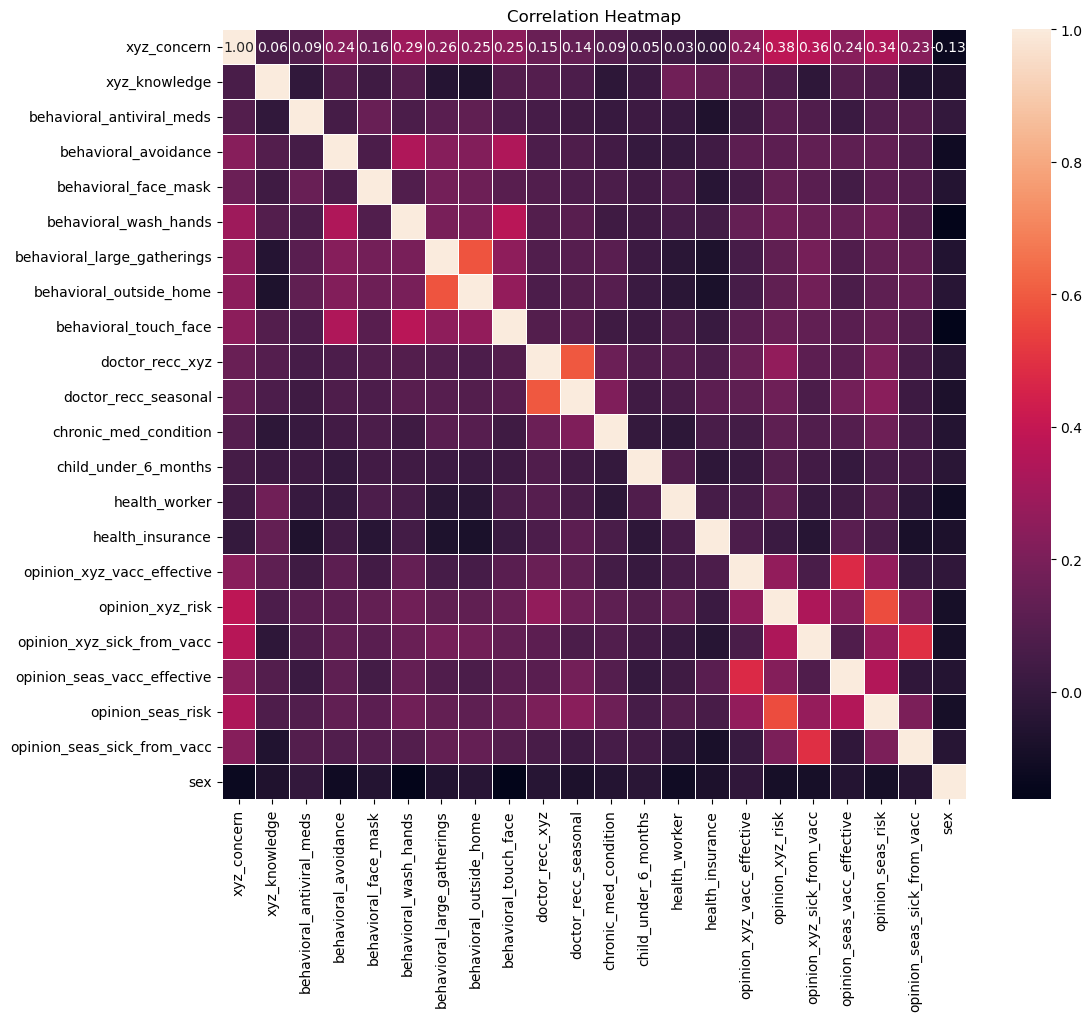

In [108]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [109]:
X = df_imputed
y = dl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21365, 22)
(5342, 22)
(21365, 2)
(5342, 2)


In [111]:
print(X_train.columns)
print(y_train.columns)

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'sex'],
      dtype='object')
Index(['xyz_vaccine', 'seasonal_vaccine'], dtype='object')


In [112]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\aksha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [113]:

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3080 - loss: 0.5361 - val_accuracy: 0.3358 - val_loss: 0.4647
Epoch 2/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3281 - loss: 0.4749 - val_accuracy: 0.3492 - val_loss: 0.4543
Epoch 3/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3323 - loss: 0.4698 - val_accuracy: 0.3674 - val_loss: 0.4776
Epoch 4/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3352 - loss: 0.4686 - val_accuracy: 0.3218 - val_loss: 0.4431
Epoch 5/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3345 - loss: 0.4535 - val_accuracy: 0.3152 - val_loss: 0.4501
Epoch 6/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3412 - loss: 0.4587 - val_accuracy: 0.3225 - val_loss: 0.4428
Epoch 7/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3340 - loss: 0.4497 - val_accuracy: 0.3110 - val_loss: 0.4433
Epoch 8/50
535/535 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3323 - loss: 0.4505 - val_accuracy: 0.

In [114]:
y_pred = model.predict(X_test)
print(y_pred)
y_pred_df = pd.DataFrame({
    'xyz_vaccine': y_pred[:, 1],
    'seasonal_vaccine': y_pred[:, 0]
}, index=X_test.index)

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0.11237899 0.31759852]
 [0.27003622 0.3132029 ]
 [0.05373411 0.7967739 ]
 ...
 [0.6153568  0.74305487]
 [0.3609529  0.6505556 ]
 [0.03976551 0.8398461 ]]


In [115]:
from sklearn.metrics import roc_auc_score
roc_auc_xyz = roc_auc_score(y_test['xyz_vaccine'], y_pred_df['xyz_vaccine'])
roc_auc_seasonal = roc_auc_score(y_test['seasonal_vaccine'], y_pred_df['seasonal_vaccine'])
mean_roc_auc = (roc_auc_xyz + roc_auc_seasonal) / 2

print(f'ROC AUC for xyz_vaccine: {roc_auc_xyz}')
print(f'ROC AUC for seasonal_vaccine: {roc_auc_seasonal}')
print(f'Mean ROC AUC: {mean_roc_auc}')

ROC AUC for xyz_vaccine: 0.7101041903033053
ROC AUC for seasonal_vaccine: 0.6730840418236875
Mean ROC AUC: 0.6915941160634964


In [116]:
df_imputed.columns

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'sex'],
      dtype='object')

In [117]:
test_df = pd.read_csv(r"C:\Users\aksha\Desktop\dataset and all\test_set_features.csv", sep=",", encoding= 'unicode_escape')

In [118]:
test_df = test_df.drop(['marital_status','race','education','income_poverty', 'rent_or_own', 'hhs_geo_region', 'employment_industry', 'employment_occupation', 'household_adults', 'household_children', 'census_msa', 'employment_status', 'age_group'], axis=1)
test_df['sex'].replace('Male', 1, inplace=True)
test_df['sex'].replace('Female', 0, inplace=True)
test_df.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'sex'],
      dtype='object')

In [119]:
pipeline = Pipeline(steps=[('imputer', KNNImputer(n_neighbors=10))])
test_df1 = pd.DataFrame(pipeline.fit_transform(test_df.drop(columns=['respondent_id'])), columns=df.columns[1:])

In [120]:
test_features_processed = test_df1
test_pred_proba = model.predict(test_features_processed)


835/835 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [121]:
for t in range(20):
  print(test_pred_proba[t])

[0.1012755  0.51233566]
[0.00954026 0.02363008]
[0.3375347 0.7858031]
[0.36617    0.70429975]
[0.34526113 0.591192  ]
[0.64134526 0.9354769 ]
[0.12822147 0.33534414]
[0.11397812 0.20548402]
[0.04715309 0.12446423]
[0.116864  0.8624786]
[0.00711092 0.59713733]
[0.22814   0.6675074]
[0.02538892 0.9527501 ]
[0.17538857 0.5844351 ]
[0.16940588 0.62918556]
[0.09027937 0.16155688]
[0.6128132  0.86269915]
[0.07409438 0.8522795 ]
[0.06174149 0.09360094]
[0.05211274 0.14582422]


In [122]:
test_pred_proba_df = pd.DataFrame({
    'respondent_id': test_df['respondent_id'],
    'xyz_vaccine': test_pred_proba[:, 1],
    'seasonal_vaccine': test_pred_proba[:, 0]
})

In [127]:
output_file_path = 'submissioncsv.csv'
test_pred_proba_df.to_csv("C:\Users\aksha\Desktop\", index=False)

SyntaxError: unterminated string literal (detected at line 2) (1162683357.py, line 2)